In [1]:
import pandas as pd
import seaborn as sns
#import matplotlib as plt
import numpy as np

In [2]:
import tqdm

In [3]:
df = pd.read_csv('archive.csv')
df

,title,content,url,publication_date,is_paywalled
0,Kolisi incertain pour la Coupe du monde,Siya Kolisi (Afrique du Sud) blessé au genou e...,https://www.lequipe.fr/Rugby/Actualites/Siya-k...,2023-04-24T21:48:10+02:00,False
1,Porter (Leinster) : « On se prépare à une énor...,Andrew Porter (Leinster) avant le choc contre ...,https://www.lequipe.fr/Rugby/Actualites/Andrew...,2023-04-24T19:37:41+02:00,False
2,Une proposition de rachat du club a été transmise,Une proposition de rachat du Biarritz Olympiqu...,https://www.lequipe.fr/Rugby/Actualites/Une-pr...,2023-04-24T18:28:08+02:00,False
3,Le retour de Jaminet espéré au mieux début juin,Le retour de Melvyn Jaminet espéré au mieux dé...,https://www.lequipe.fr/Rugby/Actualites/Le-ret...,2023-04-24T17:29:08+02:00,False
4,Fourcade et Jauneau vont prolonger,Étienne Fourcade et Baptiste Jauneau vont prol...,https://www.lequipe.fr/Rugby/Actualites/Etienn...,2023-04-24T11:33:32+02:00,False
...,...,...,...,...,...
9980,Chavancy : «Je ne sais pas si on mérite de gag...,Henry Chavancy : « Je ne sais pas si on mérite...,https://www.lequipe.fr/Rugby/Actualites/Henry-...,2020-11-07T22:02:38+01:00,False
9981,Le Racing 92 et l'UBB victorieux,Top 14 : le Racing 92 et Bordeaux-Bègles victo...,https://www.lequipe.fr/Rugby/Actualites/Top-14...,2020-11-07T20:11:06+01:00,False
9982,«Grosse entorse» pour Kaino,Toulouse : « Grosse entorse de la cheville » p...,https://www.lequipe.fr/Rugby/Actualites/Toulou...,2020-11-07T19:02:38+01:00,False
9983,Buttin replacé ouvreur,Top 14 : Agen avec Jean-Marcellin Buttin à l'o...,https://www.lequipe.fr/Rugby/Actualites/Top-14...,2020-11-07T18:54:43+01:00,False


In [4]:
df = df.loc[:,'title':'content']

In [5]:
df

,title,content
0,Kolisi incertain pour la Coupe du monde,Siya Kolisi (Afrique du Sud) blessé au genou e...
1,Porter (Leinster) : « On se prépare à une énor...,Andrew Porter (Leinster) avant le choc contre ...
2,Une proposition de rachat du club a été transmise,Une proposition de rachat du Biarritz Olympiqu...
3,Le retour de Jaminet espéré au mieux début juin,Le retour de Melvyn Jaminet espéré au mieux dé...
4,Fourcade et Jauneau vont prolonger,Étienne Fourcade et Baptiste Jauneau vont prol...
...,...,...
9980,Chavancy : «Je ne sais pas si on mérite de gag...,Henry Chavancy : « Je ne sais pas si on mérite...
9981,Le Racing 92 et l'UBB victorieux,Top 14 : le Racing 92 et Bordeaux-Bègles victo...
9982,«Grosse entorse» pour Kaino,Toulouse : « Grosse entorse de la cheville » p...
9983,Buttin replacé ouvreur,Top 14 : Agen avec Jean-Marcellin Buttin à l'o...


In [6]:
for col in df.columns:
    print(col, df[col].isnull().sum())

title 0
content 0


In [7]:
import spacy
nlp = spacy.load('fr_core_news_md')


In [9]:
longueur_moyenne_titre=0
longueur_moyenne_article=0

Longueur des titres en nombres de lettres

<AxesSubplot: >

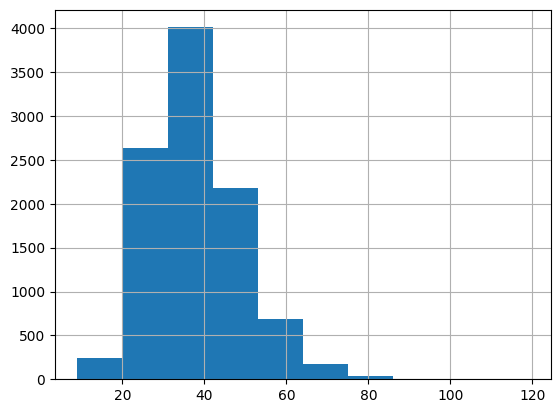

In [10]:
df['title'].str.len().hist()

Title tokenization and NER recognition

In [11]:
df

,title,content
0,Kolisi incertain pour la Coupe du monde,Siya Kolisi (Afrique du Sud) blessé au genou e...
1,Porter (Leinster) : « On se prépare à une énor...,Andrew Porter (Leinster) avant le choc contre ...
2,Une proposition de rachat du club a été transmise,Une proposition de rachat du Biarritz Olympiqu...
3,Le retour de Jaminet espéré au mieux début juin,Le retour de Melvyn Jaminet espéré au mieux dé...
4,Fourcade et Jauneau vont prolonger,Étienne Fourcade et Baptiste Jauneau vont prol...
...,...,...
9980,Chavancy : «Je ne sais pas si on mérite de gag...,Henry Chavancy : « Je ne sais pas si on mérite...
9981,Le Racing 92 et l'UBB victorieux,Top 14 : le Racing 92 et Bordeaux-Bègles victo...
9982,«Grosse entorse» pour Kaino,Toulouse : « Grosse entorse de la cheville » p...
9983,Buttin replacé ouvreur,Top 14 : Agen avec Jean-Marcellin Buttin à l'o...


In [12]:
liste_tokens=[]
longueus_phrases=[]
locations=[]
persons=[]
Rest_of_NER=[]


for index,values in df.iterrows():
    doc=nlp(values['title'])
    tokens=[]
    loc=[]
    per=[]
    misc=[]

    long=0
    for i in doc:
        
        tokens.append(i.lemma_)
        if i.ent_type_ == 'LOC' :
            if i.ent_iob_ == 'B':
                loc.append(i.text)
            elif i.ent_iob_ == 'I':
                loc[-1] += ' ' +i.text

        if i.ent_type_ == 'PER' :
            if i.ent_iob_ == 'B':
                per.append(i.text)
            elif i.ent_iob_ == 'I':
                per[-1] += ' ' +i.text

        if i.ent_type_ == 'ORG' or i.ent_type_ == 'MISC':
            if i.ent_iob_ == 'B':
                misc.append(i.text)
            elif i.ent_iob_ == 'I':
                misc[-1] += ' ' +i.text


         
    locations.append(loc)
    persons.append(per)
    Rest_of_NER.append(misc)
    long=len(tokens)
    longueus_phrases.append(long)
    liste_tokens.append(tokens)
    

In [13]:
df['Tokens_titre']=liste_tokens
df['Longueur_titre']= longueus_phrases
df['Locations']=locations
df['Persons']=persons
df['Rest_of_Ner']=Rest_of_NER

In [14]:
df

,title,content,Tokens_titre,Longueur_titre,Locations,Persons,Rest_of_Ner
0,Kolisi incertain pour la Coupe du monde,Siya Kolisi (Afrique du Sud) blessé au genou e...,"[Kolisi, incertain, pour, le, coupe, de, monde]",7,[],[Kolisi],[Coupe du monde]
1,Porter (Leinster) : « On se prépare à une énor...,Andrew Porter (Leinster) avant le choc contre ...,"[porter, (, Leinster, ), , :, «, , on, se, p...",19,"[Porter, Leinster, Toulouse]",[],[]
2,Une proposition de rachat du club a été transmise,Une proposition de rachat du Biarritz Olympiqu...,"[un, proposition, de, rachat, de, club, avoir,...",9,[],[],[]
3,Le retour de Jaminet espéré au mieux début juin,Le retour de Melvyn Jaminet espéré au mieux dé...,"[le, retour, de, Jaminet, espérer, au, mieux, ...",9,[],[Jaminet],[]
4,Fourcade et Jauneau vont prolonger,Étienne Fourcade et Baptiste Jauneau vont prol...,"[fourcade, et, Jauneau, aller, prolonger]",5,[Fourcade],[Jauneau],[]
...,...,...,...,...,...,...,...
9980,Chavancy : «Je ne sais pas si on mérite de gag...,Henry Chavancy : « Je ne sais pas si on mérite...,"[Chavancy, :, «, je, ne, savoir, pas, si, on, ...",13,[Chavancy],[],[]
9981,Le Racing 92 et l'UBB victorieux,Top 14 : le Racing 92 et Bordeaux-Bègles victo...,"[le, Racing, 92, et, le, UBB, victorieu]",7,[],[],"[Racing 92, UBB]"
9982,«Grosse entorse» pour Kaino,Toulouse : « Grosse entorse de la cheville » p...,"[«, gros, entorse, », pour, Kaino]",6,[],[Kaino],[]
9983,Buttin replacé ouvreur,Top 14 : Agen avec Jean-Marcellin Buttin à l'o...,"[Buttin, replacer, ouvreur]",3,[],[Buttin],[]


Articles length in words

<AxesSubplot: >

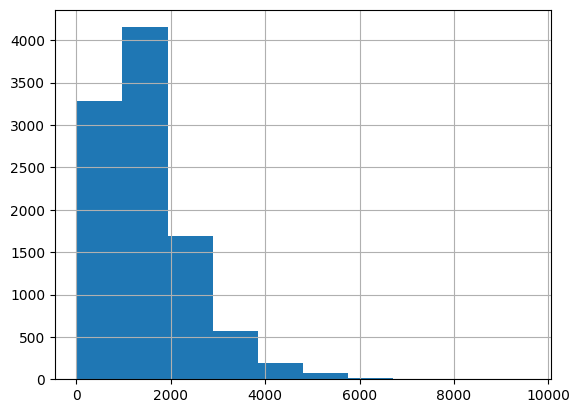

In [15]:
f=df['content'].str.len()
f.hist()

Title length in words

<AxesSubplot: >

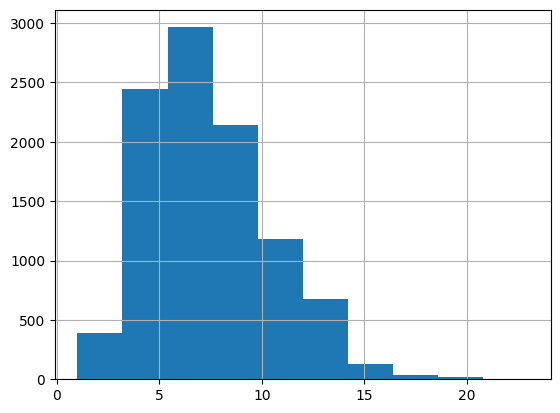

In [16]:
df['Tokens_titre'].str.len().hist()

Import of stopwords and identification of most frequent words

In [17]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stopwords_list = stopwords.words('french')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\franc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
corpus=[]
new= df['Tokens_titre']
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords_list:
        dic[word]+=1

In [19]:
corpus

['Kolisi',
 'incertain',
 'pour',
 'le',
 'coupe',
 'de',
 'monde',
 'porter',
 '(',
 'Leinster',
 ')',
 '\xa0',
 ':',
 '«',
 '\xa0',
 'on',
 'se',
 'prépare',
 'à',
 'un',
 'énorme',
 'bataille',
 '»',
 '\xa0',
 'contre',
 'Toulouse',
 'un',
 'proposition',
 'de',
 'rachat',
 'de',
 'club',
 'avoir',
 'être',
 'transmettre',
 'le',
 'retour',
 'de',
 'Jaminet',
 'espérer',
 'au',
 'mieux',
 'début',
 'juin',
 'fourcade',
 'et',
 'Jauneau',
 'aller',
 'prolonger',
 'fin',
 'de',
 'saison',
 'pour',
 'Barlot',
 'le',
 'équipe',
 'type',
 'de',
 'le',
 '23',
 'journée',
 'Koroibete',
 'élu',
 'meilleur',
 'joueur',
 'de',
 'le',
 'année',
 'Lucu',
 ':',
 '\xa0',
 '«',
 'ce',
 'victoire',
 'aller',
 'compter',
 '»',
 'Tuisova',
 'victime',
 'de',
 'un',
 'entorse',
 'de',
 'le',
 'cheville',
 'Garbajosa',
 ':',
 '«',
 'frustrant',
 'et',
 'décevant',
 '»',
 'Bordeaux',
 '-',
 'Bègles',
 'battre',
 'Lyon',
 'et',
 'le',
 'dépasser',
 'au',
 'classement',
 'trémoulière',
 ':',
 '\xa0',
 '«'

<AxesSubplot: >

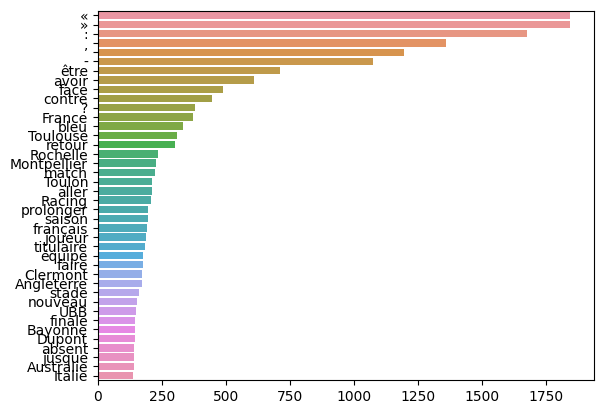

In [20]:
from collections import Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in stopwords_list):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)

In [21]:
from nltk.util import ngrams
list(ngrams(['I' ,'went','to','the','river','bank'],2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

In [22]:
corpus

['Kolisi',
 'incertain',
 'pour',
 'le',
 'coupe',
 'de',
 'monde',
 'porter',
 '(',
 'Leinster',
 ')',
 '\xa0',
 ':',
 '«',
 '\xa0',
 'on',
 'se',
 'prépare',
 'à',
 'un',
 'énorme',
 'bataille',
 '»',
 '\xa0',
 'contre',
 'Toulouse',
 'un',
 'proposition',
 'de',
 'rachat',
 'de',
 'club',
 'avoir',
 'être',
 'transmettre',
 'le',
 'retour',
 'de',
 'Jaminet',
 'espérer',
 'au',
 'mieux',
 'début',
 'juin',
 'fourcade',
 'et',
 'Jauneau',
 'aller',
 'prolonger',
 'fin',
 'de',
 'saison',
 'pour',
 'Barlot',
 'le',
 'équipe',
 'type',
 'de',
 'le',
 '23',
 'journée',
 'Koroibete',
 'élu',
 'meilleur',
 'joueur',
 'de',
 'le',
 'année',
 'Lucu',
 ':',
 '\xa0',
 '«',
 'ce',
 'victoire',
 'aller',
 'compter',
 '»',
 'Tuisova',
 'victime',
 'de',
 'un',
 'entorse',
 'de',
 'le',
 'cheville',
 'Garbajosa',
 ':',
 '«',
 'frustrant',
 'et',
 'décevant',
 '»',
 'Bordeaux',
 '-',
 'Bègles',
 'battre',
 'Lyon',
 'et',
 'le',
 'dépasser',
 'au',
 'classement',
 'trémoulière',
 ':',
 '\xa0',
 '«'

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:200]

In [25]:
corpus=[]
new= df['Tokens_titre']
corpus=[word for i in new  for word in i if word not  in stopwords_list]
corpus = ' '.join(corpus)
texte= []
texte.append(corpus)

bigramm = get_top_ngram(texte, 2)
bigramm

[('stade français', 121),
 ('all blacks', 99),
 ('racing 92', 90),
 ('prolonger jusque', 80),
 ('fin saison', 78),
 ('où quand', 78),
 ('quand voir', 78),
 ('équipe type', 72),
 ('afrique sud', 68),
 ('bordeaux bègles', 58),
 ('nouvelle zélande', 58),
 ('saint andré', 53),
 ('avoir être', 50),
 ('titulaire contre', 47),
 ('mont de', 47),
 ('de marsan', 47),
 ('pays galles', 46),
 ('demi finale', 42),
 ('qu falloir', 40),
 ('top flop', 40),
 ('top 14', 39),
 ('falloir retenir', 39),
 ('joker médical', 38),
 ('titulaire face', 38),
 ('retour contre', 37),
 ('saison prochain', 37),
 ('jusque 2025', 37),
 ('grand chelem', 36),
 ('coupe monde', 35),
 ('positif covid', 33),
 ('covid 19', 33),
 ('être mourir', 31),
 ('deux an', 28),
 ('prendre retraite', 28),
 ('jusque 2024', 27),
 ('avoir faire', 26),
 ('dragon catalans', 26),
 ('contre angleterre', 26),
 ('contre italie', 26),
 ('trois semaine', 25),
 ('retour face', 25),
 ('meilleur joueur', 24),
 ('cas positif', 24),
 ('direct équipe', 23

<AxesSubplot: >

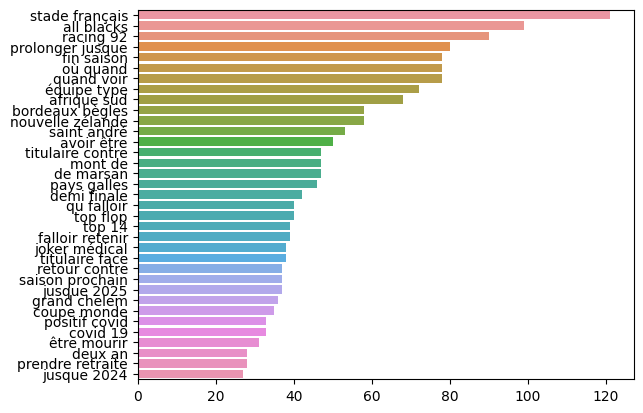

In [26]:
x, y= [], []
for word,count in bigramm[:35]:
    if (word not in stopwords_list):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)


In [27]:
for n,i in bigramm:
    #print(n)
    if "stade" in n:
        print(n,i)

stade français 121
face stade 15
stade toulousain 13


In [28]:
c=0
for i,v in df.iterrows():
    if """dupont"""  in v['title'].lower() :
        print(v['title'])
        c+=1
print(c)

Dupont : «Je suis encore très bien ici»
Dupont élu meilleur joueur du Tournoi
«Ntamack aussi indispensable que Dupont»
Penaud, Dupont et Ramos nommés pour le titre de meilleur joueur
Dupont : «Ne pas baisser le niveau de vigilance»
Dupont : «Des sensations de maîtrise agréables sur le terrain»
Dupont, sous surveillance
Dupont : «On sait qu'on est dans les clous»
Dupont : «On a un peu trop laissé jouer Russell»
Dupont : «Beaucoup de satisfaction»
Dupont, une gestion qui interroge
Dupont : «On ne va pas tout remettre à zéro»
Dupont : «Taulier, c'est un bien grand mot»
Huget : Dupont «se donne sans compter»
Dupont au bord de la fatigue
Le plaquage «de lutteur» de Dupont face à l'Irlande
L'incroyable retour défensif de Dupont en vidéo
Dupont : «Les remettre en question»
Dupont : «Augmenter notre niveau dans tous les secteurs»
Dupont : «L'Italie, une équipe plus que dangereuse»
Dupont - Ntamack, l'association record
Couilloud appelé à Capbreton pour remplacer Dupont
Dupont : «Le niveau mont

Import of TextBlob for sentiment analysis

In [29]:
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
blob =Blobber( pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())


0.0

<AxesSubplot: >

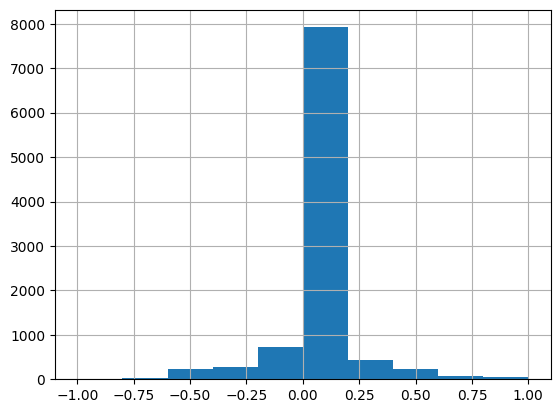

In [30]:
df['polarity_score']=df['title'].apply(lambda x : blob(x).sentiment[0])
df['polarity_score'].hist()

In [31]:
df

,title,content,Tokens_titre,Longueur_titre,Locations,Persons,Rest_of_Ner,polarity_score
0,Kolisi incertain pour la Coupe du monde,Siya Kolisi (Afrique du Sud) blessé au genou e...,"[Kolisi, incertain, pour, le, coupe, de, monde]",7,[],[Kolisi],[Coupe du monde],-0.30
1,Porter (Leinster) : « On se prépare à une énor...,Andrew Porter (Leinster) avant le choc contre ...,"[porter, (, Leinster, ), , :, «, , on, se, p...",19,"[Porter, Leinster, Toulouse]",[],[],0.22
2,Une proposition de rachat du club a été transmise,Une proposition de rachat du Biarritz Olympiqu...,"[un, proposition, de, rachat, de, club, avoir,...",9,[],[],[],0.00
3,Le retour de Jaminet espéré au mieux début juin,Le retour de Melvyn Jaminet espéré au mieux dé...,"[le, retour, de, Jaminet, espérer, au, mieux, ...",9,[],[Jaminet],[],0.00
4,Fourcade et Jauneau vont prolonger,Étienne Fourcade et Baptiste Jauneau vont prol...,"[fourcade, et, Jauneau, aller, prolonger]",5,[Fourcade],[Jauneau],[],0.00
...,...,...,...,...,...,...,...,...
9980,Chavancy : «Je ne sais pas si on mérite de gag...,Henry Chavancy : « Je ne sais pas si on mérite...,"[Chavancy, :, «, je, ne, savoir, pas, si, on, ...",13,[Chavancy],[],[],-0.05
9981,Le Racing 92 et l'UBB victorieux,Top 14 : le Racing 92 et Bordeaux-Bègles victo...,"[le, Racing, 92, et, le, UBB, victorieu]",7,[],[],"[Racing 92, UBB]",0.80
9982,«Grosse entorse» pour Kaino,Toulouse : « Grosse entorse de la cheville » p...,"[«, gros, entorse, », pour, Kaino]",6,[],[Kaino],[],0.00
9983,Buttin replacé ouvreur,Top 14 : Agen avec Jean-Marcellin Buttin à l'o...,"[Buttin, replacer, ouvreur]",3,[],[Buttin],[],0.00


In [32]:
def sentiment(x):
    if x<0:
        return 'neg'
    elif x==0:
        return 'neu'
    else:
        return 'pos'

df['polarity']=df['polarity_score'].map(lambda x: sentiment(x))

df

,title,content,Tokens_titre,Longueur_titre,Locations,Persons,Rest_of_Ner,polarity_score,polarity
0,Kolisi incertain pour la Coupe du monde,Siya Kolisi (Afrique du Sud) blessé au genou e...,"[Kolisi, incertain, pour, le, coupe, de, monde]",7,[],[Kolisi],[Coupe du monde],-0.30,neg
1,Porter (Leinster) : « On se prépare à une énor...,Andrew Porter (Leinster) avant le choc contre ...,"[porter, (, Leinster, ), , :, «, , on, se, p...",19,"[Porter, Leinster, Toulouse]",[],[],0.22,pos
2,Une proposition de rachat du club a été transmise,Une proposition de rachat du Biarritz Olympiqu...,"[un, proposition, de, rachat, de, club, avoir,...",9,[],[],[],0.00,neu
3,Le retour de Jaminet espéré au mieux début juin,Le retour de Melvyn Jaminet espéré au mieux dé...,"[le, retour, de, Jaminet, espérer, au, mieux, ...",9,[],[Jaminet],[],0.00,neu
4,Fourcade et Jauneau vont prolonger,Étienne Fourcade et Baptiste Jauneau vont prol...,"[fourcade, et, Jauneau, aller, prolonger]",5,[Fourcade],[Jauneau],[],0.00,neu
...,...,...,...,...,...,...,...,...,...
9980,Chavancy : «Je ne sais pas si on mérite de gag...,Henry Chavancy : « Je ne sais pas si on mérite...,"[Chavancy, :, «, je, ne, savoir, pas, si, on, ...",13,[Chavancy],[],[],-0.05,neg
9981,Le Racing 92 et l'UBB victorieux,Top 14 : le Racing 92 et Bordeaux-Bègles victo...,"[le, Racing, 92, et, le, UBB, victorieu]",7,[],[],"[Racing 92, UBB]",0.80,pos
9982,«Grosse entorse» pour Kaino,Toulouse : « Grosse entorse de la cheville » p...,"[«, gros, entorse, », pour, Kaino]",6,[],[Kaino],[],0.00,neu
9983,Buttin replacé ouvreur,Top 14 : Agen avec Jean-Marcellin Buttin à l'o...,"[Buttin, replacer, ouvreur]",3,[],[Buttin],[],0.00,neu


<AxesSubplot: >

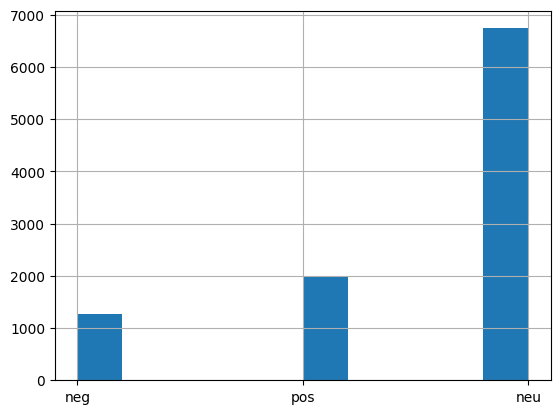

In [33]:
df['polarity'].hist()


Types of NER 

In [34]:
from collections import Counter

def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

ent=df['title'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

counter=Counter(ent)
count=counter.most_common()

<AxesSubplot: >

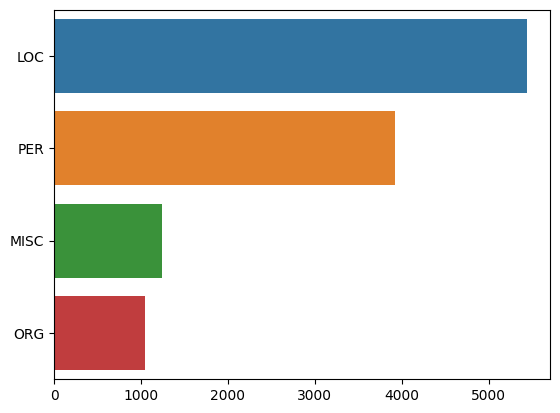

In [35]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

#Topic modelling

In [36]:
import nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('french')


def preprocess_news(df):
    corpus=[]
    
    for news in df['title']:
        words=[]
        for w in nlp(news):
            if w.ent_iob_ == 'B' or w.ent_iob_=='I':     # we add the NER in the corpus as their type (ex :Dupont --> PER or Toulouse --> LOC)
                words.append(w.ent_type_)

            
            elif w.lemma_ not in stop_words:             # and we remove  the stopwords and add the words in their lemma form
                words.append(w.lemma_)
                
        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

In [71]:
corpus[:3]

[['PER', 'incertain', 'MISC', 'MISC', 'MISC'],
 ['LOC',
  '(',
  'LOC',
  ')',
  '\xa0',
  ':',
  '«',
  '\xa0',
  'prépare',
  'énorme',
  'bataille',
  '»',
  '\xa0',
  'contre',
  'LOC'],
 ['proposition', 'rachat', 'club', 'avoir', 'être', 'transmettre']]

In [38]:
import gensim
dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [39]:
bow_corpus

[[(0, 3), (1, 1), (2, 1)],
 [(3, 1),
  (4, 1),
  (5, 1),
  (6, 3),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 3),
  (11, 1),
  (12, 1),
  (13, 1)],
 [(14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(1, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(1, 1), (6, 1), (25, 1), (26, 1)],
 [(6, 1), (27, 1), (28, 1)],
 [(29, 1), (30, 1), (31, 1), (32, 1)],
 [(0, 1), (33, 1), (34, 1), (35, 1), (36, 1)],
 [(1, 1), (5, 1), (10, 1), (11, 1), (12, 1), (25, 1), (37, 1), (38, 1)],
 [(1, 1), (39, 1), (40, 1), (41, 1)],
 [(1, 1), (5, 1), (11, 1), (12, 1), (42, 1), (43, 1)],
 [(6, 2), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1)],
 [(1, 1), (5, 1), (10, 1), (11, 1), (12, 1), (19, 1), (49, 1), (50, 1)],
 [(1, 1), (5, 1), (10, 1), (11, 1), (12, 1), (19, 1), (51, 1)],
 [(1, 1), (5, 1), (10, 1), (11, 1), (12, 1), (52, 1), (53, 1), (54, 1)],
 [(1, 1), (55, 1), (56, 1)],
 [(57, 1), (58, 1), (59, 1), (60, 1)],
 [(1, 1), (61, 1), (62, 1), (63, 1), (64, 1)],
 [(57, 2), (65, 1), (66, 1), (67, 1), (68, 1),

In [58]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 3,
                                   id2word = dic,
                                   passes = 50,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.316*"LOC" + 0.061*"ORG" + 0.035*"-" + 0.023*"face" + 0.022*"," + 0.021*"contre" + 0.010*"?" + 0.008*"titulaire" + 0.007*"retour" + 0.007*"équipe"'),
 (1,
  '0.203*"PER" + 0.078*"«" + 0.076*"»" + 0.070*":" + 0.051*"\xa0" + 0.029*"être" + 0.025*"avoir" + 0.019*"," + 0.008*"saison" + 0.006*"aller"'),
 (2,
  '0.198*"MISC" + 0.028*"," + 0.016*"joueur" + 0.012*"?" + 0.011*"semaine" + 0.011*"absent" + 0.009*"nouveau" + 0.009*"deux" + 0.008*"suspendre" + 0.008*"an"')]

In [59]:
topics = []
for idx, topic in lda_model.print_topics(-1) :
    print("Topic: {} -> Words: {}".format(idx, topic))
    topics.append(topic)

Topic: 0 -> Words: 0.316*"LOC" + 0.061*"ORG" + 0.035*"-" + 0.023*"face" + 0.022*"," + 0.021*"contre" + 0.010*"?" + 0.008*"titulaire" + 0.007*"retour" + 0.007*"équipe"
Topic: 1 -> Words: 0.203*"PER" + 0.078*"«" + 0.076*"»" + 0.070*":" + 0.051*" " + 0.029*"être" + 0.025*"avoir" + 0.019*"," + 0.008*"saison" + 0.006*"aller"
Topic: 2 -> Words: 0.198*"MISC" + 0.028*"," + 0.016*"joueur" + 0.012*"?" + 0.011*"semaine" + 0.011*"absent" + 0.009*"nouveau" + 0.009*"deux" + 0.008*"suspendre" + 0.008*"an"


In [60]:
from gensim.models import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dic)
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.40315752673399813


In [61]:
#import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.280197 -0.107887       1        1  41.440981
0     -0.244391 -0.163449       2        1  36.804418
2     -0.035807  0.271336       3        1  21.754601, topic_info=        Term         Freq        Total Category  logprob  loglift
6        LOC  6186.000000  6186.000000  Default  30.0000  30.0000
1        PER  4477.000000  4477.000000  Default  29.0000  29.0000
0       MISC  2299.000000  2299.000000  Default  28.0000  28.0000
11         «  1723.000000  1723.000000  Default  27.0000  27.0000
12         »  1683.000000  1683.000000  Default  26.0000  26.0000
..       ...          ...          ...      ...      ...      ...
559  falloir    48.265207    91.214108   Topic3  -5.4804   0.8888
53      tout    46.008427    97.407998   Topic3  -5.5283   0.7753
432  tournée    38.050817    57.057793   Topic3  -5.7182   1.1202
24    retour    48.175488   251.108815   Topic3  -5.4823  -0.1257
109    match    44.464585   207.160772   Topic3  -5.5624  -0.0135

[158 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
518       1  0.981452       !
3         1  0.234905       (
3         2  0.771831       (
4         1  0.215008       )
4         2  0.780819       )
...     ...       ...     ...
11        1  0.999641       «
12        1  0.999462       »
32        1  0.179790  équipe
32        2  0.818356  équipe
19        1  0.998396    être

[154 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [62]:
import re
data = df['title'].values.tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]



<>:5: DeprecationWarning: invalid escape sequence '\S'
<>:8: DeprecationWarning: invalid escape sequence '\s'
<>:5: DeprecationWarning: invalid escape sequence '\S'
<>:8: DeprecationWarning: invalid escape sequence '\s'
C:\Users\franc\AppData\Local\Temp\ipykernel_19480\1078511468.py:5: DeprecationWarning: invalid escape sequence '\S'
  data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]
C:\Users\franc\AppData\Local\Temp\ipykernel_19480\1078511468.py:8: DeprecationWarning: invalid escape sequence '\s'
  data = [re.sub('\s+', ' ', sent) for sent in data]


In [63]:
def format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus , texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()
    liste_topic=[]

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                
                liste_topic.append(topic_num)
                #print(liste_topic)

            else:
                break

    return(liste_topic)

liste_topics = format_topics_sentences(ldamodel=lda_model, corpus=bow_corpus, texts=data)



In [64]:
liste_topics

[2,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 2,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 1,
 1,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 1,
 0,
 1,
 0,


In [65]:
df['topic_number']= liste_topics


In [66]:
df


,title,content,Tokens_titre,Longueur_titre,Locations,Persons,Rest_of_Ner,polarity_score,polarity,topic_number
0,Kolisi incertain pour la Coupe du monde,Siya Kolisi (Afrique du Sud) blessé au genou e...,"[Kolisi, incertain, pour, le, coupe, de, monde]",7,[],[Kolisi],[Coupe du monde],-0.30,neg,2
1,Porter (Leinster) : « On se prépare à une énor...,Andrew Porter (Leinster) avant le choc contre ...,"[porter, (, Leinster, ), , :, «, , on, se, p...",19,"[Porter, Leinster, Toulouse]",[],[],0.22,pos,1
2,Une proposition de rachat du club a été transmise,Une proposition de rachat du Biarritz Olympiqu...,"[un, proposition, de, rachat, de, club, avoir,...",9,[],[],[],0.00,neu,1
3,Le retour de Jaminet espéré au mieux début juin,Le retour de Melvyn Jaminet espéré au mieux dé...,"[le, retour, de, Jaminet, espérer, au, mieux, ...",9,[],[Jaminet],[],0.00,neu,1
4,Fourcade et Jauneau vont prolonger,Étienne Fourcade et Baptiste Jauneau vont prol...,"[fourcade, et, Jauneau, aller, prolonger]",5,[Fourcade],[Jauneau],[],0.00,neu,1
...,...,...,...,...,...,...,...,...,...,...
9980,Chavancy : «Je ne sais pas si on mérite de gag...,Henry Chavancy : « Je ne sais pas si on mérite...,"[Chavancy, :, «, je, ne, savoir, pas, si, on, ...",13,[Chavancy],[],[],-0.05,neg,1
9981,Le Racing 92 et l'UBB victorieux,Top 14 : le Racing 92 et Bordeaux-Bègles victo...,"[le, Racing, 92, et, le, UBB, victorieu]",7,[],[],"[Racing 92, UBB]",0.80,pos,2
9982,«Grosse entorse» pour Kaino,Toulouse : « Grosse entorse de la cheville » p...,"[«, gros, entorse, », pour, Kaino]",6,[],[Kaino],[],0.00,neu,1
9983,Buttin replacé ouvreur,Top 14 : Agen avec Jean-Marcellin Buttin à l'o...,"[Buttin, replacer, ouvreur]",3,[],[Buttin],[],0.00,neu,1


In [67]:
for i,v in df.iterrows():
    if v['topic_number']==0:
        print(v['title'])

L'équipe type de la 23e journée
Bordeaux-Bègles bat Lyon et le dépasse au classement
Accord de principe avec Chocobares pour une prolongation
Avant le Crunch, les Bleues enchaînent face aux Galloises
Où et quand voir Bordeaux-Bègles - Lyon ?
Le Stade Français l'emporte devant Toulouse
Bayonne s'impose devant Montpellier
Les compos d'UBB-Lyon
Succès bonifié de La Rochelle face à Clermont
Graou, l'as des seconds
Presque un sommet
Où et quand voir La Rochelle - Clermont ?
Où et quand voir Stade Français - Toulouse ?
Davies (Dragons) signe deux ans
Les compos des matches de la 23e journée
Bourdon forfait, Chambon titulaire contre Galles
Danty out pour la demi-finale ?
Les arbitres des demi-finales désignés
Macalou, Panis et Ward forfait contre Toulouse
Carbonneau prolonge à Brive
Opération déminage au GIP France
Feleu de retour contre le pays de Galles
Le coup de sifflet qui fâche
L'équipe type de la 22e journée
Le champion vers la sortie
Toulouse en deux temps face à Lyon
Les Bleues étril

In [68]:
for i,v in df.iterrows():
    if v['topic_number']==1:
        print(v['title'])

Porter (Leinster) : « On se prépare à une énorme bataille » contre Toulouse
Une proposition de rachat du club a été transmise
Le retour de Jaminet espéré au mieux début juin
Fourcade et Jauneau vont prolonger
Fin de saison pour Barlot
Lucu : «Cette victoire va compter»
Tuisova victime d'une entorse de la cheville
Garbajosa : «Frustrant et décevant»
Trémoulière : «On n'est que de passage»
Escudero : «Je me suis amusée»
Ortiz : «Une solidarité à toute épreuve»
Affluence record à Grenoble
Lartot annonce son amputation de la jambe droite
Habel-Küffner : «Pas notre meilleure victoire de l'année»
Jaminet sort blessé à la cheville droite
Arlettaz : «C'est beau, c'est magnifique»
Travers : «On a tout fait pour le perdre»
L'arrivée de Cowan-Dickie compromise
Mignot : « Alexandra Chambon prend de l'ampleur dans le groupe »
Trémoulière : « Quand le prince Albert a prononcé mon nom... »
Retraite forcée pour Navidi
Rattez : « Un match à la mort contre Bayonne »
David Berty, une passion retrouvée
Bl

In [69]:
for i,v in df.iterrows():
    if v['topic_number']==2:
        print(v['title'])

Kolisi incertain pour la Coupe du monde
Koroibete élu meilleur joueur de l'année
Picut, française et internationale
Grill candidat à la présidence
La leçon de drop de Lopez
Tedder, le casseur de l'année
Buisson candidat à la présidence
L'angoisse des joueurs en fin de contrat
Peine réduite pour Colombe qui jouera la demie de Coupe des champions
Azéma en pole pour devenir manager
Des huissiers présents au siège du club
Atonio : «En Pro D2, je prenais deux, trois patates...»
Delon Armitage insulte les supporters clermontois
McInally raccroche pour devenir pilote de ligne
Des projets revus à la baisse
Un nouveau logo pour les Pumas
Maraku absent un mois
Un nouveau principe d'arbitrage sera testé au Mondial U20
Boulard, Hermet et Llorens ont porté les Bleues
Reus, le jeune demi d'ouverture qui impressionne
Opération rédemption
Les compos de la 22e journée
Sazy futur entraîneur des jeunes ?
Penaud absent un mois
Une nouvelle compétition pour monter
Le Championnat qui tire les Bleues vers le